# Spectral Residual Saliency
http://ieeexplore.ieee.org/xpls/icp.jsp?arnumber=4270292

1.jpg


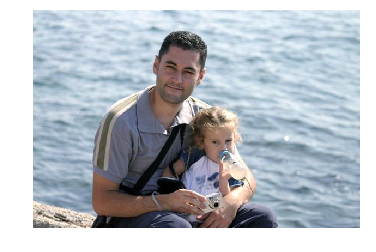

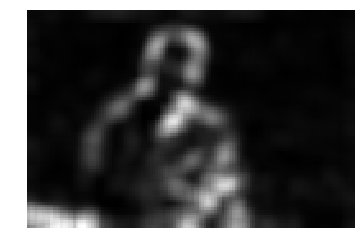

bird.jpg


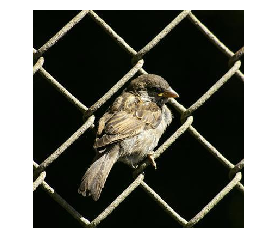

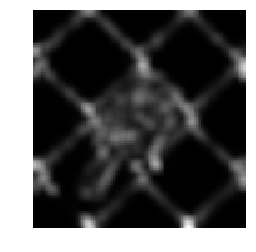

2.jpg


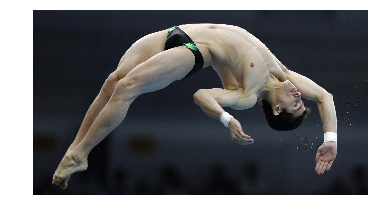

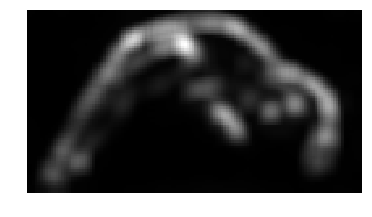

3.jpg


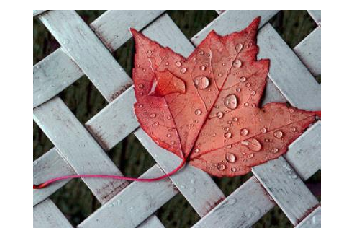

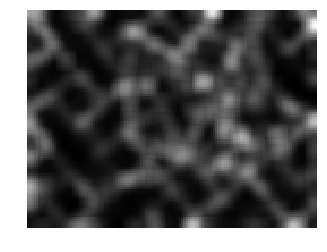

In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
import cv2
WIDTH = 128
PATH = './hw2_test_images'
all_imgs = os.listdir(PATH)
for img_name in all_imgs:
    img_path = os.path.join(PATH, img_name)
    print img_name
    bgr_img = cv2.imread(img_path)
    rgb_img = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2RGB)
    img = cv2.imread(img_path, 0)

    H, W = img.shape
    img = cv2.resize(img, (WIDTH, WIDTH*H/W))

    c = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
    mag = np.sqrt(c[:, :, 0]**2 + c[:, :, 1]**2)
    speRes = np.exp(np.log(mag) - cv2.boxFilter(np.log(mag), -1, (3,3)))

    c[:, :, 0] = c[:, :, 0] * speRes / mag
    c[:, :, 1] = c[:, :, 1] * speRes / mag
    c = cv2.dft(c, flags = (cv2.DFT_INVERSE | cv2.DFT_SCALE))
    mag = c[:, :, 0]**2 + c[:, :, 1]**2
    cv2.normalize(cv2.GaussianBlur(mag, (9,9), 3, 3), mag, 0., 1., cv2.NORM_MINMAX)
    
    # original image show
    plt.imshow(rgb_img)
    plt.axis("off")
    plt.show()    
    # saliency map image show
    plt.imshow(mag, cmap='gray')
    plt.axis("off")
    plt.show()